In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
# Load the Superstore dataset
df = pd.read_csv("superstore.csv")
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [3]:
# Basic structure and info
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (51290, 27)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales

In [4]:
# Remove duplicates
df = df.drop_duplicates()

# Handling missing values
df = df.fillna(df.median(numeric_only=True))

# Confirm cleaning
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [5]:
# Detect and remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['Sales', 'Profit', 'Discount']:
    df = remove_outliers_iqr(df, col)

In [6]:
# Summary statistics
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,35211.000000,35211.0,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000,35211.000000
mean,0.090807,1.0,12.484086,3.147880,24938.537843,93.662435,10.154277,2012.782653,31.322996
std,0.146826,0.0,18.851626,2.021069,14710.799760,101.474356,14.423327,1.097150,14.385054
min,0.000000,1.0,-40.020000,1.000000,1.000000,1.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,1.980000,2.000000,12059.000000,26.000000,2.145000,2012.000000,20.000000
50%,0.000000,1.0,8.454000,3.000000,24991.000000,56.000000,5.236000,2013.000000,33.000000
75%,0.200000,1.0,21.600000,4.000000,37422.500000,122.000000,12.130000,2014.000000,44.000000
max,0.500000,1.0,66.660000,14.000000,51290.000000,581.000000,246.050000,2014.000000,53.000000


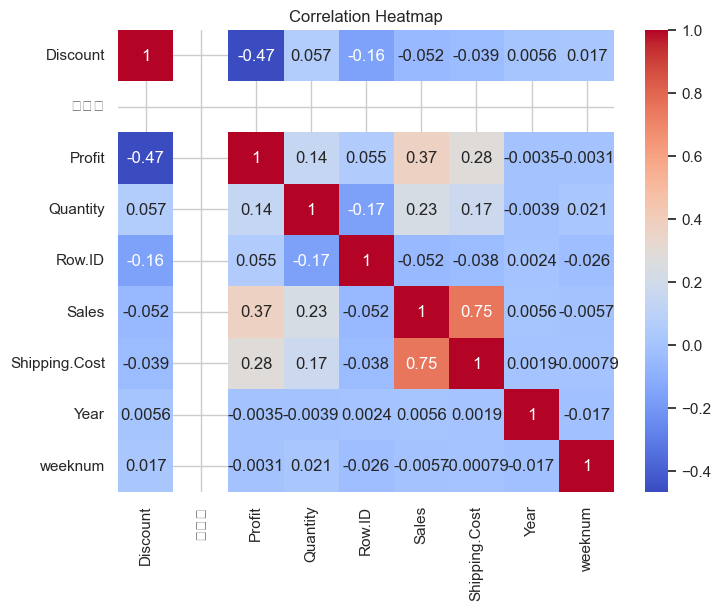

In [7]:
# Correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

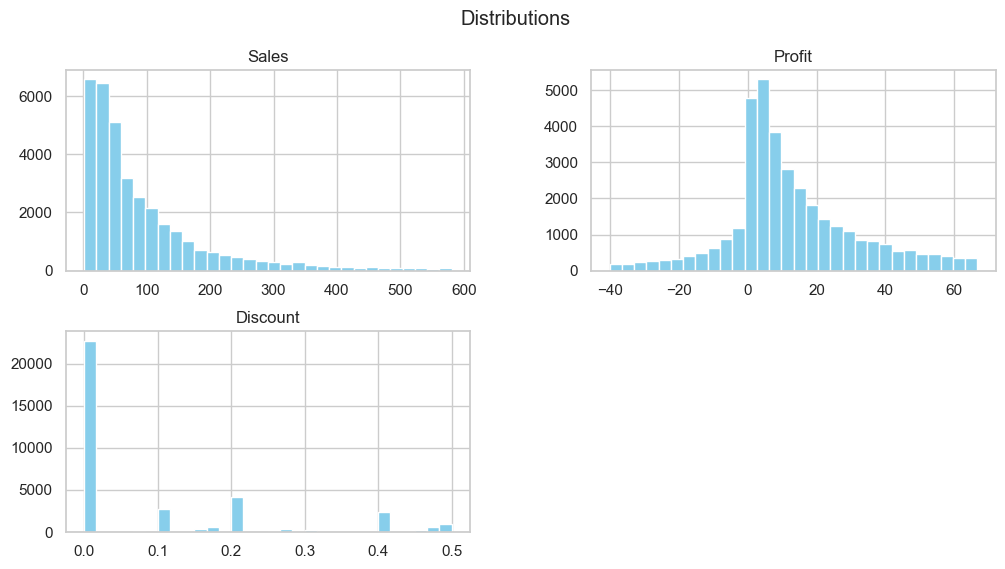

In [8]:
df[['Sales', 'Profit', 'Discount']].hist(bins=30, figsize=(12, 6), color='skyblue')
plt.suptitle('Distributions')
plt.show()

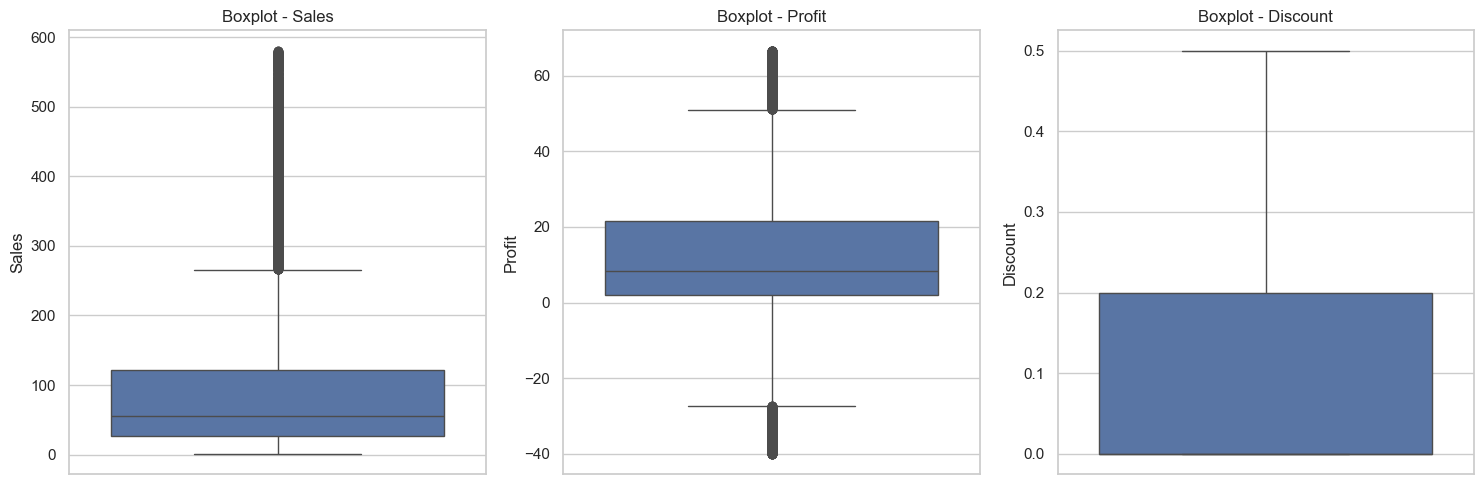

In [9]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Sales', 'Profit', 'Discount']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [13]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df = df.dropna(subset=['Order.Date'])  # Drop rows with invalid dates
df = df.sort_values('Order.Date')

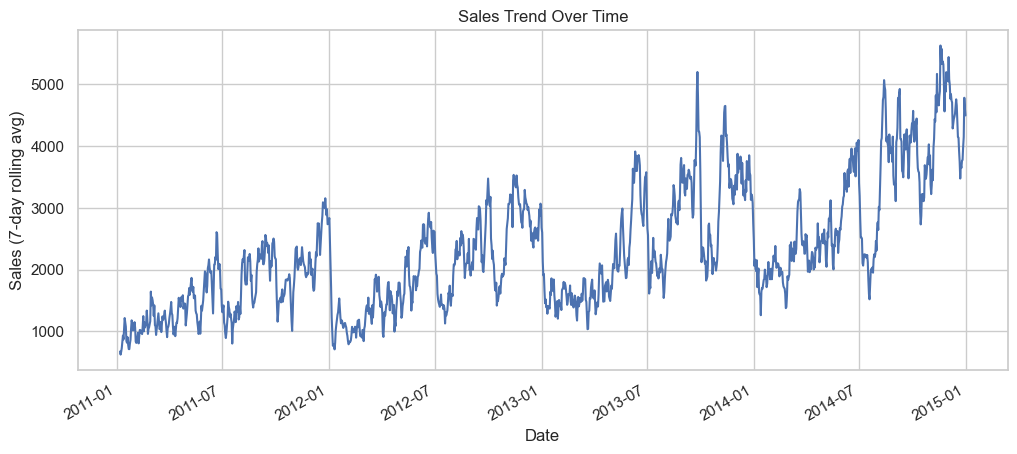

In [15]:
# Resample sales data
ts = df.groupby('Order.Date')['Sales'].sum()

plt.figure(figsize=(12, 5))
ts.rolling(window=7).mean().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (7-day rolling avg)')
plt.show()

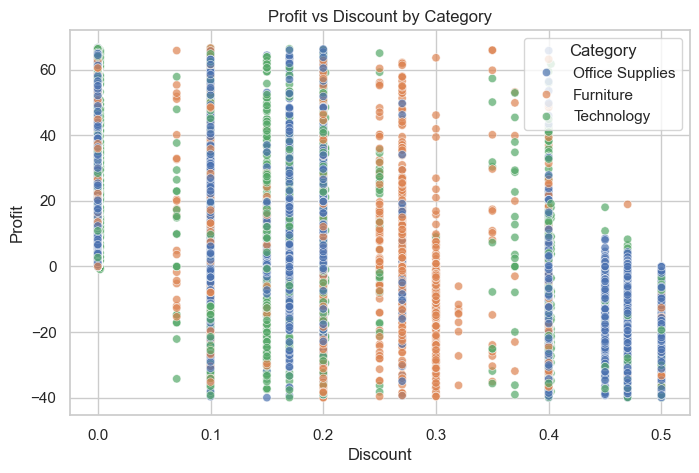

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', alpha=0.7)
plt.title('Profit vs Discount by Category')
plt.show()

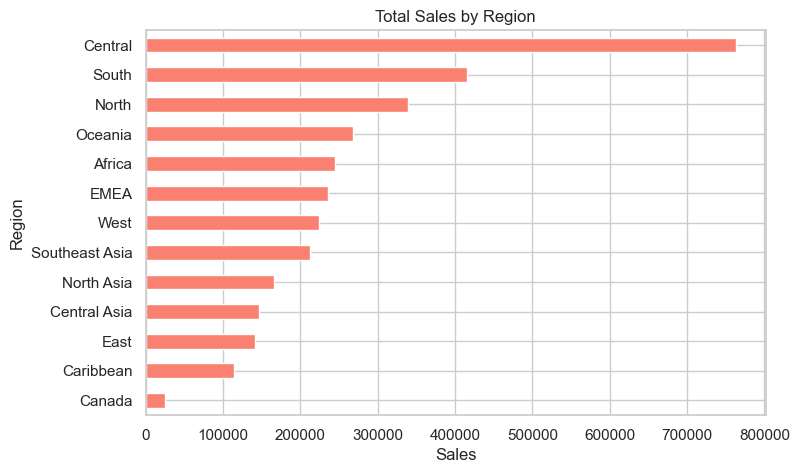

In [17]:
plt.figure(figsize=(8, 5))
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='barh', color='salmon')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.show()

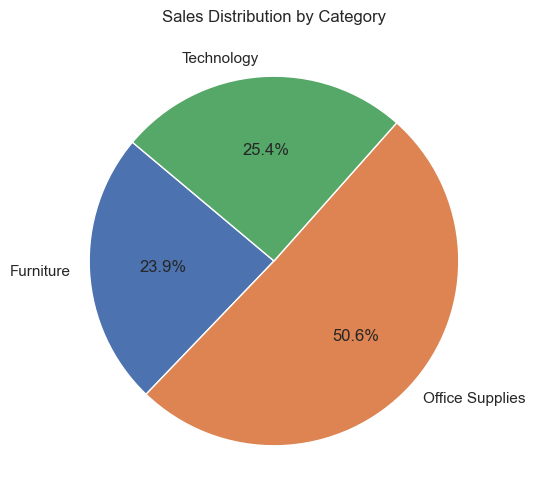

In [18]:
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

In [19]:
# Select relevant features
X = df[['Profit', 'Discount']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.1336
Mean Squared Error: 8642.72


In [22]:
print("Key Insights:")
print("- Sales trend shows seasonal or time-related fluctuations.")
print("- Higher discounts generally reduce profit, but may not increase sales proportionally.")
print("- West and East regions contribute the most to sales.")
print("- Technology is the highest-selling category.")
print("- The model predicts sales with modest accuracy using just Profit and Discount.")

Key Insights:
- Sales trend shows seasonal or time-related fluctuations.
- Higher discounts generally reduce profit, but may not increase sales proportionally.
- West and East regions contribute the most to sales.
- Technology is the highest-selling category.
- The model predicts sales with modest accuracy using just Profit and Discount.
